# File for the first look and feel of the Bank Marketing data and its EDA 

In [1]:
# importing libraries to read the data and visualise it
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# setting the display options
pd.options.display.max_columns = None
pd.options.display.float_format = '{:.6f}'.format

# setting the plot size for all plots
plt.rcParams['figure.figsize']=(10,8)

# suppressing warnings
import warnings
warnings.filterwarnings('ignore')

### Data set source:
1. [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014
2. http://repositorium.sdum.uminho.pt/bitstream/1822/14838/1/MoroCortezLaureano_DMApproach4DirectMKT.pdf
3. https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

# Data description

## Input variables:
   ### bank client data:
   1 - age (numeric)<br>
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")<br>
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)<br>
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")<br>
   5 - default: has credit in default? (categorical: "no","yes","unknown")<br>
   6 - housing: has housing loan? (categorical: "no","yes","unknown")<br>
   7 - loan: has personal loan? (categorical: "no","yes","unknown")<br>
   
   ### related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone") <br>
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")<br>
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")<br>
  11 - duration: last contact duration, in seconds (numeric). **Important note**:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>
  
   ### other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
  14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")<br>
  
   ### social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
      &emsp;Employment rates are defined as a measure of the extent to which available labour resources (people available to work) are being used. They are calculated as the ratio of the employed to the working age population. Employed people are those aged 15 or over who report that they have worked in gainful employment for at least one hour in the previous week or who had a job but were absent from work during the reference week. The working age population refers to people aged 15 to 64. This indicator is seasonally adjusted and it is measured in terms of thousand persons aged 15 and over; and in numbers of employed persons aged 15 to 64 as a percentage of working age population.<br>
      &emsp;Ref: https://data.oecd.org/emp/employment-rate.htm<br><br>
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)   <br>
      &emsp;**Meaning**: The Consumer Price Index (CPI) is a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services. 
      When economists talk about rising inflation, they are usually referring to a rise in the Consumer Price Index, which tracks overall prices on the retail level.<br>
      Inflation can have a negative impact on fixed-income assets when it results in higher interest rates.
Fixed-income instruments include bonds and certificates of deposit (CD) like term deposits.
Prices of fixed-income assets move opposite to their yields.
Inflation typically occurs during periods of economic strength and when prices for wages, merchandise, and commodities begin to increase.<br>
      &emsp;Ref: https://www.bls.gov/cpi/ <br>
      This is a lagging indicator, means that it is calcuated after the economic activity is concluded. A lagging indicator is an observable or measurable factor that changes some time after the economic, financial, or business variable it is correlated with changes.<br>
      &emsp;Ref: https://www.investopedia.com/terms/l/laggingindicator.asp<br>
      Lagging indicators are economic models that confirm trends that are already happening. The unemployment rate, for example, goes up only after the jobs have already been lost. Leading indicators, on the other hand, are forecasting models that try to predict a future change in the economy.<br>
      &emsp;Ref: https://www.gobankingrates.com/money/economy/economy-explained-consumer-confidence-index-affect/<br>
      &emsp;**Significance**: a higher CPI indicates higher inflation, while a falling CPI indicates lower inflation, or even deflation.<br><br>
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)  <br>
      &emsp;**Meaning**: This consumer confidence indicator provides an indication of future developments of households' consumption and saving, based upon answers regarding their expected financial situation, their sentiment about the general economic situation, unemployment and capability of savings. An indicator above 100 signals a boost in the consumers’ confidence towards the future economic situation, as a consequence of which they are less prone to save, and more inclined to spend money on major purchases in the next 12 months. Values below 100 indicate a pessimistic attitude towards future developments in the economy, possibly resulting in a tendency to save more and consume less.
      <br>&emsp;Ref: OECD (2021), Consumer confidence index (CCI) (indicator). doi: 10.1787/46434d78-en (Accessed on 06 March 2021)
      <br>&emsp;**Significance**: Many businesses make use of the consumer confidence index to structure their marketing and sales efforts based on the current findings of the research. Bankers and other lending institutions make use of consumer confidence reports of this nature to gauge lending activity and the potential for an upswing in loan defaults
      <br>&emsp;Ref: https://www.wisegeek.com/what-is-the-consumer-confidence-index.htm )<br><br>
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
      &emsp;**Meaning** : The Euro Interbank Offered Rate is a daily reference rate, published by the European Money Markets Institute, based on the averaged interest rates at which Eurozone banks offer to lend unsecured funds to other banks in the euro wholesale money market.<br>
      &emsp;Ref: emmi-benchmarks.eu <br>
      &emsp;The 3 month Euribor interest rate is the interest rate at which a selection of European banks lend one another funds denominated in euros whereby the loans have a maturity of 3 months. Alongside the 3 month Euribor interest rate we have another 14 Euribor interest rates with different maturities. The Euribor interest rates are the most important European interbank interest rates. When the Euribor interest rates rise or fall (substantially) there is a high likelihood that the interest rates on banking products such as mortgages, savings accounts and loans will also be adjusted.<br>
      &emsp;Ref: https://www.global-rates.com/en/interest-rates/euribor/euribor-interest-3-months.aspx<br>
  20 - nr.employed: number of employees - quarterly indicator (numeric) <br>


  ### Output variable (desired target):
  21 - y - has the client subscribed a term deposit? (binary: "yes","no") <br>
        &emsp;**Meaning**: A term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution. It is a type of deposit account held at a financial institution where money is locked up for some set period of time. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. Typically, term deposits offer higher interest rates than traditional liquid savings accounts, whereby customers can withdraw their money at any time. <br>
        &emsp;**Relation with interest rate**: In periods of rising interest rates, consumers are more likely to purchase term deposits since the increased cost of borrowing makes savings more attractive. Also, with higher market interest rates, the financial institution will need to offer the investor a higher rate of interest, so the investor also earns more.<br>
When interest rates decrease, consumers are encouraged to borrow and spend more, thereby stimulating the economy. In a low interest rate environment, demand for term deposits can decrease since investors can typically find alternative investment vehicles&emsp; that pay a higher rate. <br>
        &emsp;**Relation with inflation** : Interest rates don't keep up with rising inflation. Unfortunately, term deposits do not keep up with inflation. The inflation rate is a measure of how much prices rise in a given year. If the rate on a term deposit is 2% and the inflation rate in the U.S. is 2.5%, theoretically, the customer is not earning enough to compensate for price increases in the economy.<br>
        &emsp;Ref: https://www.investopedia.com/terms/t/termdeposit.asp)<br><br>
Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. <br>

**Note:** The data [was] collected from 2008 to 2013, thus including the effects of the recent financial crisis. <br>
&emsp;Ref: http://repositorium.sdum.uminho.pt/bitstream/1822/30994/1/dss-v3.pdf

## Reading the data and Starting EDA

In [2]:
data = pd.read_csv("bank-additional-full.csv", na_values= 'unknown')

In [3]:
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.857000,5191.000000,no


In [4]:
data.shape

(41188, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
data[data.duplicated(keep = 'first')]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.100000,93.994000,-36.400000,4.855000,5191.000000,no
12261,36,retired,married,NaN,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.400000,93.918000,-42.700000,4.966000,5228.100000,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.400000,93.918000,-42.700000,4.962000,5228.100000,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.400000,93.918000,-42.700000,4.962000,5228.100000,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.400000,93.918000,-42.700000,4.968000,5228.100000,no
20216,55,services,married,high.school,NaN,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.400000,93.444000,-36.100000,4.965000,5228.100000,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.400000,93.444000,-36.100000,4.966000,5228.100000,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.100000,93.200000,-42.000000,4.153000,5195.800000,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.800000,93.075000,-47.100000,1.423000,5099.100000,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.800000,92.893000,-46.200000,1.313000,5099.100000,no


## Missing Value Analysis

In [7]:
percentage = (data.isnull().sum()/data.count()) *100
total = data.isnull().sum()
missing_vals = pd.concat([total, percentage], axis = 1).rename(columns = {0:'Total', 1:'Percentage'})
missing_vals

,Total,Percentage
age,0,0.000000
job,330,0.807675
marital,80,0.194609
education,1731,4.387054
default,8597,26.378448
housing,990,2.462809
loan,990,2.462809
contact,0,0.000000
month,0,0.000000
day_of_week,0,0.000000


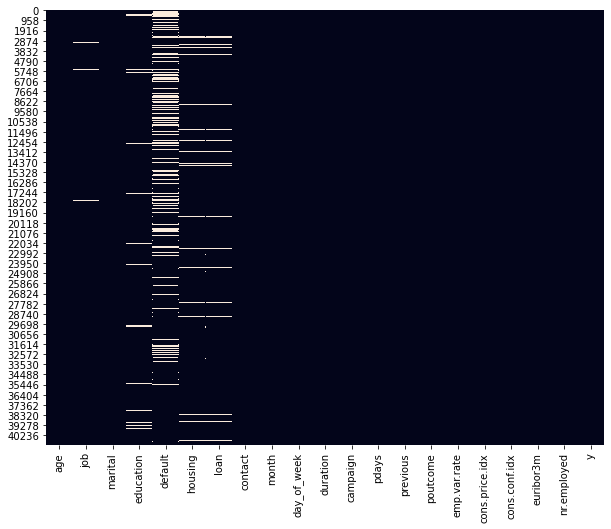

In [8]:
sns.heatmap(data.isnull(), cbar = False)

In [9]:
data.fillna('unknown', inplace = True)

In [1]:
percentage = (data.isnull().sum()/len(data) *100
total = data.isnull().sum()
missing_vals = pd.concat([total, percentage], axis = 1).rename(columns = {0:'Total', 1:'Percentage'})
missing_vals

NameError: name 'data' is not defined

## Checking the five point summary for numerical data

In [11]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.024060,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.421250,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Checking the summary statistics for categorical data

In [12]:
cat_data_desc = data.describe(include = object).T

In [13]:
percentage = cat_data_desc.loc[:, 'freq']/ cat_data_desc.loc[:, 'count'] * 100
pd.concat([cat_data_desc, percentage], axis = 1).rename(columns = {0: 'Percentage'})

,count,unique,top,freq,Percentage
job,41188,12,admin.,10422,25.303486
marital,41188,4,married,24928,60.522482
education,41188,8,university.degree,12168,29.542585
default,41188,3,no,32588,79.120132
housing,41188,3,yes,21576,52.384190
loan,41188,3,no,33950,82.426920
contact,41188,2,cellular,26144,63.474798
month,41188,10,may,13769,33.429640
day_of_week,41188,5,thu,8623,20.935709
poutcome,41188,3,nonexistent,35563,86.343110


## Segregating the data into categorical and numerical data

In [14]:
num_data = data.select_dtypes(include = np.number)

In [15]:
cat_data = data.select_dtypes(include = np.object)

## Starting the numerical data analysis

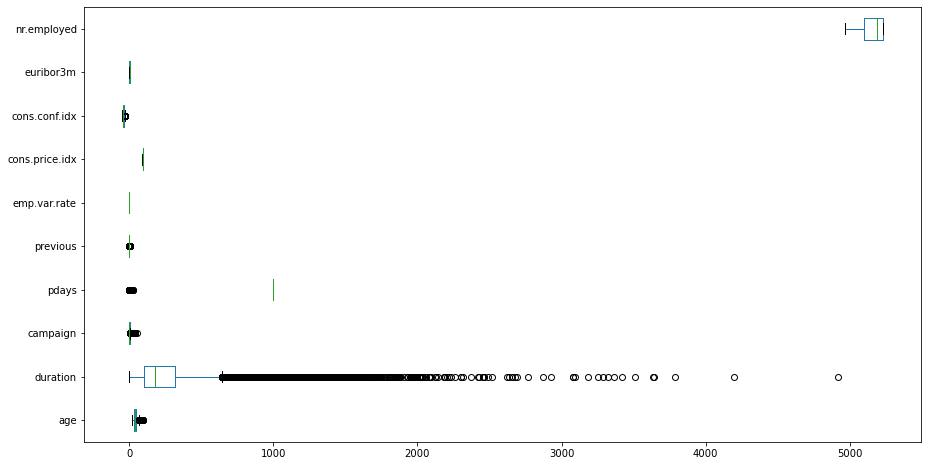

In [16]:
plt.rcParams['figure.figsize']=(15,8)
num_data.plot(kind = 'box', vert = False)

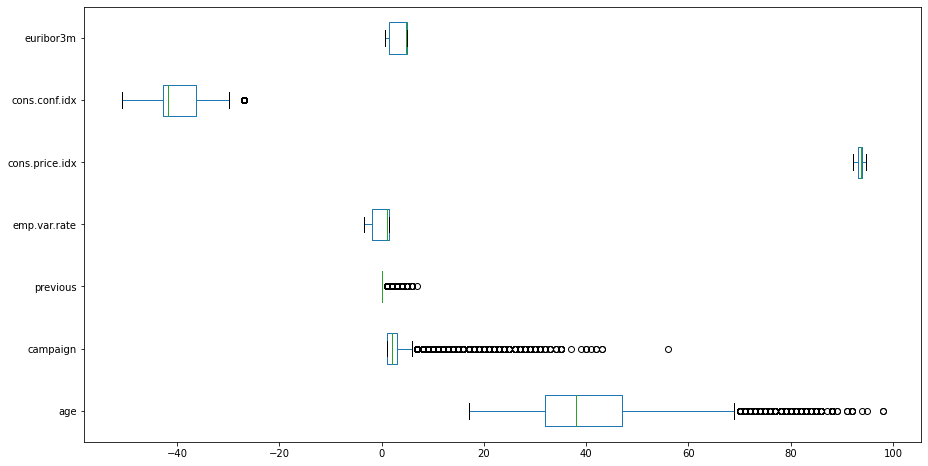

In [17]:
num_data.drop(columns = ['duration', 'nr.employed', 'pdays']).plot(kind = 'box', vert = False)

## Checking the distribution of numerical data

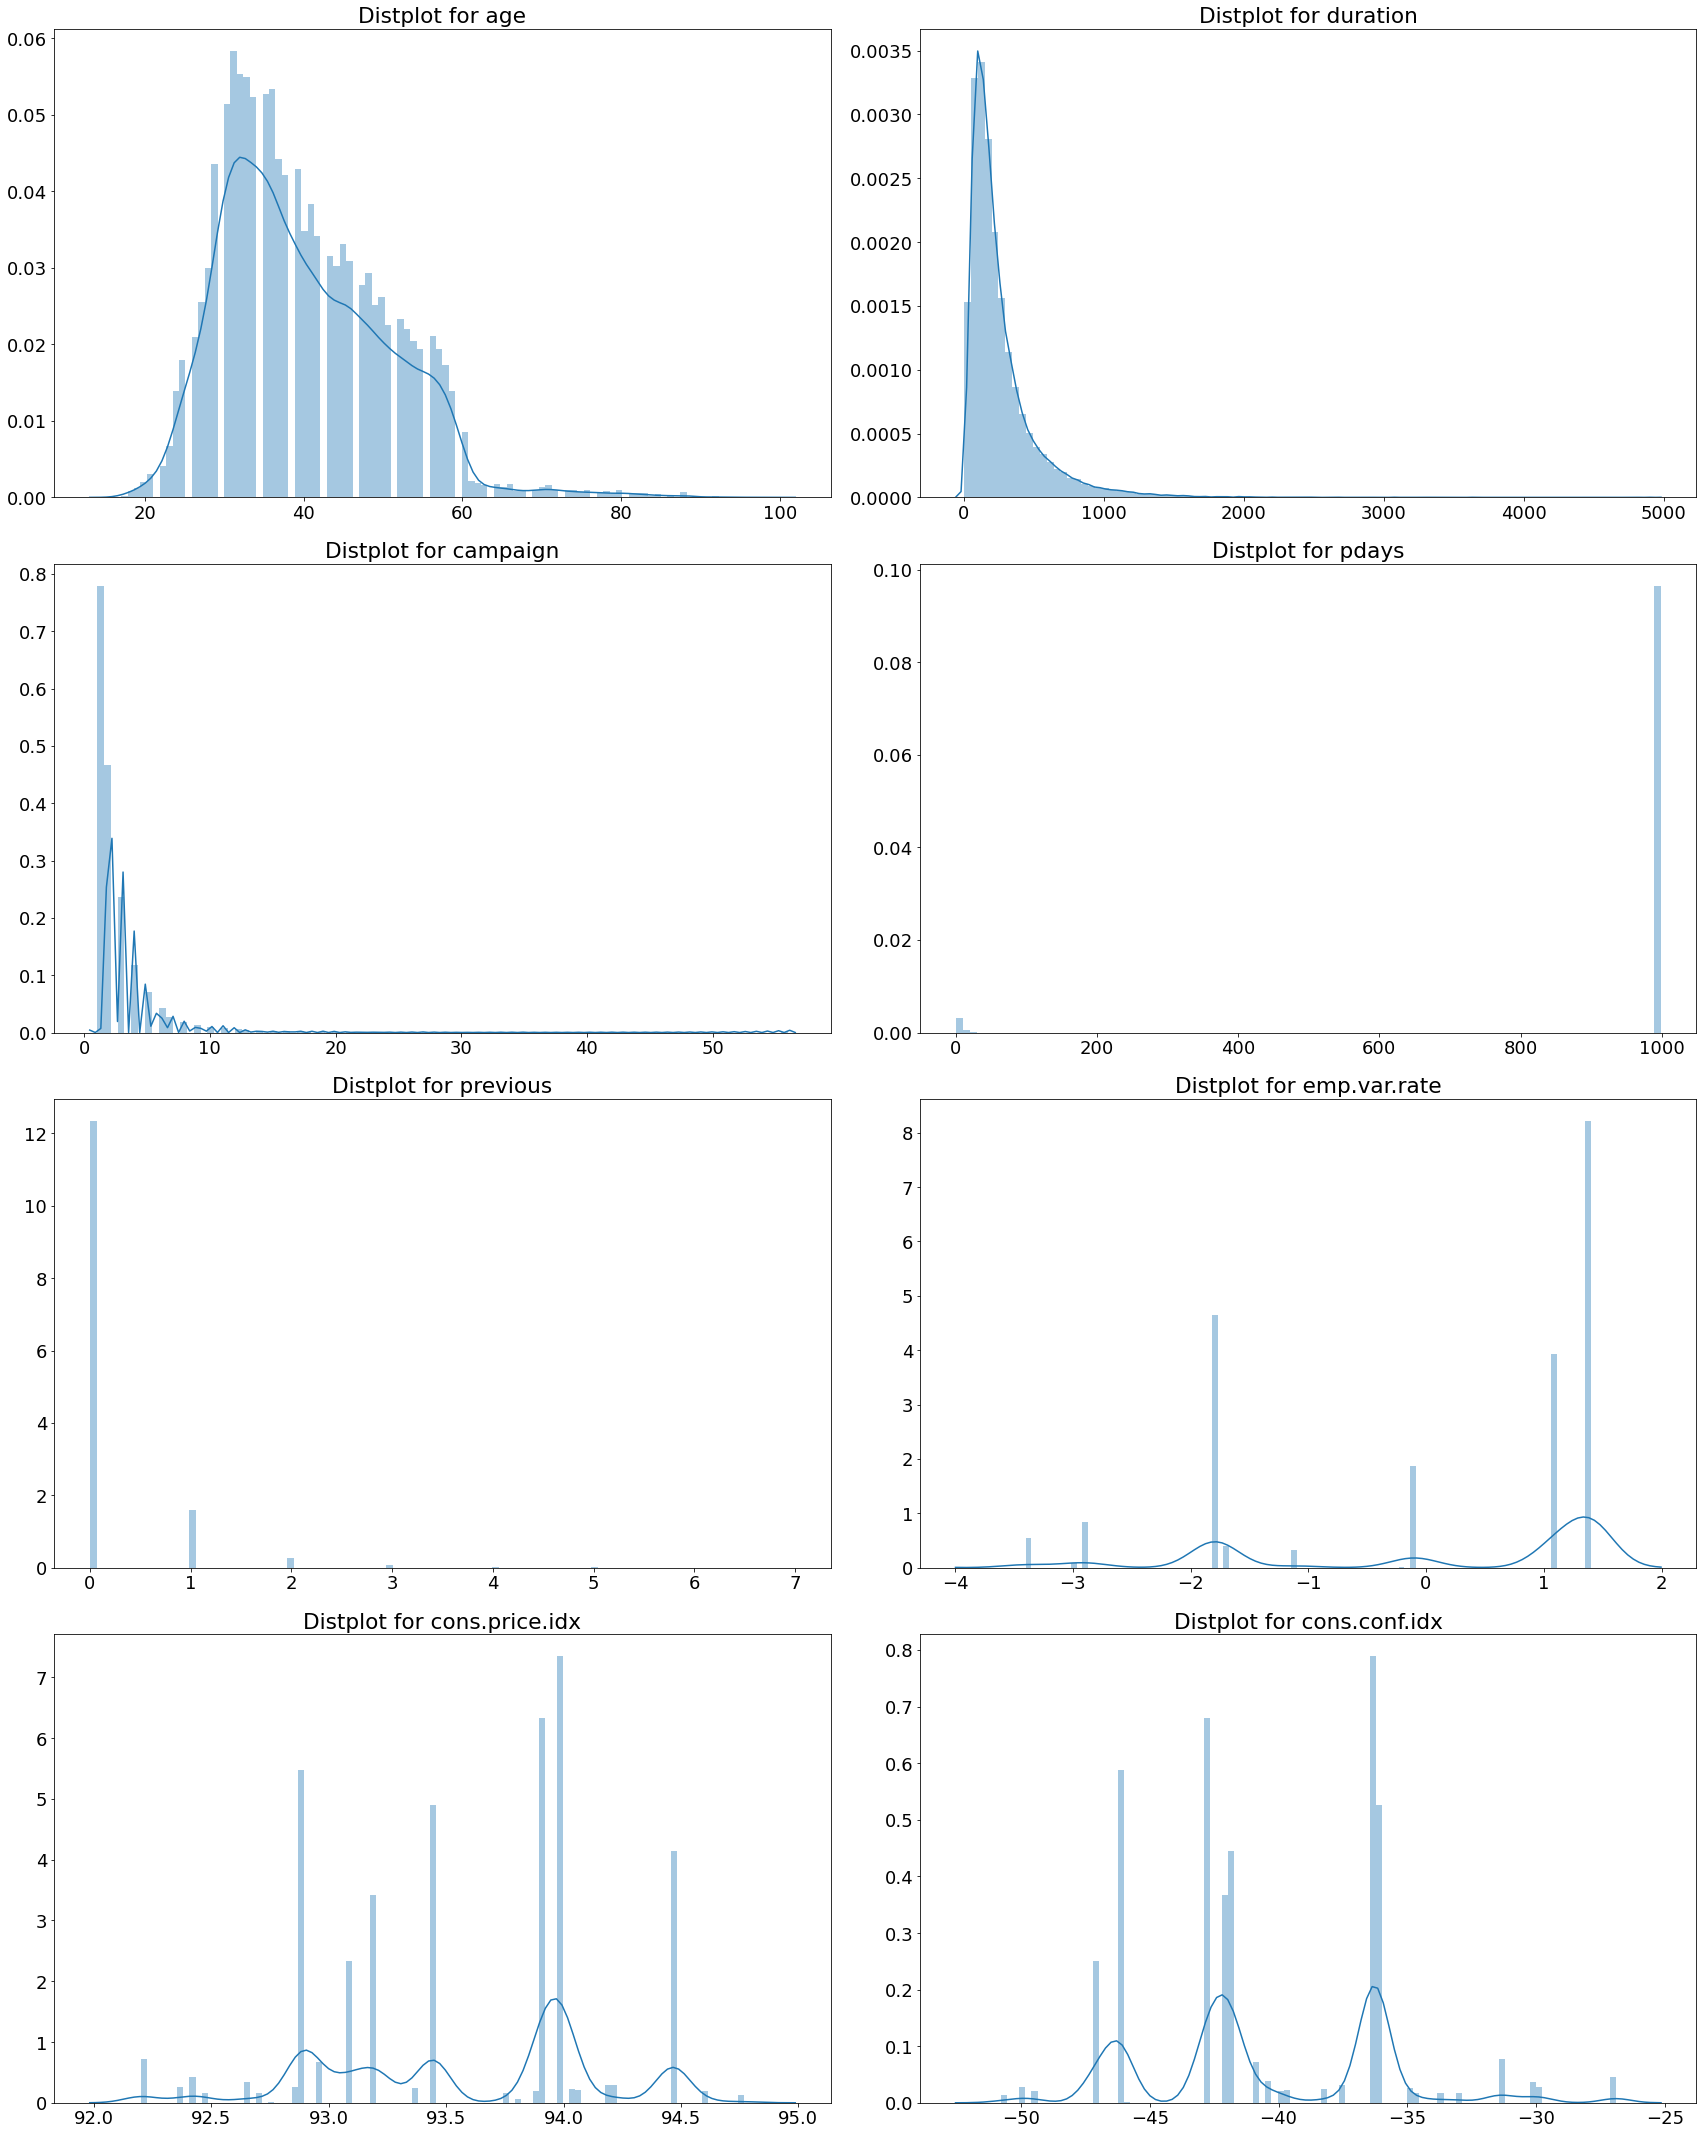

In [18]:
plt.rcParams['figure.figsize']=(24,30)
plt.rcParams.update({'font.size': 18})
figure, axes = plt.subplots(4, 2)

for col, axis in zip(num_data.columns, axes.flatten()):
        sns.distplot(pd.DataFrame(num_data.loc[:, col]), bins = 100, ax = axis, )
        axis.set_title('Distplot for {}'.format(col))
        plt.tight_layout()
        
plt.show()


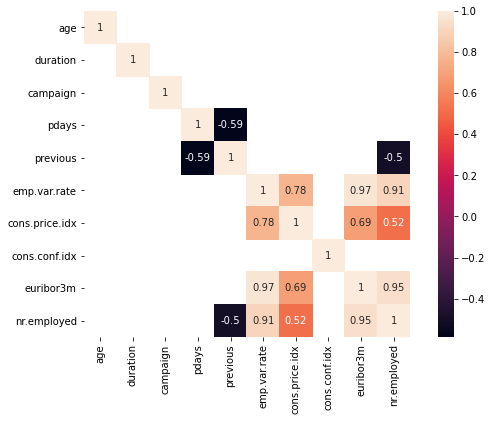

In [19]:
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams.update({'font.size': 10})

sns.heatmap(num_data.corr()[abs(num_data.corr())> 0.5], annot = True, square = True)

There is a strong correlation of previous with pdays, which is understood as both are metrics of the last campaign. But there is negative correlation between these variables, which means that both these values moved in the opposite directions. emp.var.rate is highly correlated with nr.employed, euribor3m, and cons.price.idx. 
cons.price.idx is highly correlated with nr.employed and euribor3m. 
euribor3m is highly correlated with nr.employed.

Other than the pairs listed above, there is weak or no correlation between other pairs of variables.

<s>Cannot find reason to explain the high correlation between euribor3m and the other factors like nr.employed and emp.var.rate.</s>

There might be high correlation between some variables, but that does not mean that one variable is causing the other. It is important to note that correlation does not imply causation, but it can be explained due to the presence of some other confounding factor. In this case, it might be due to the economic downturn as this data comes from the period of the stock market crash of 2008 and afterwards. 

Just to make sure, will plot scatter plots for all these pairs, try to fit regression line over the same, using the regplot plotting technique of seaborn. If the regression line can sufficiently explain the pattern between the variables, then it can be verified that the correlation between the variables is actually present, and is not a fluke.

## Plotting regression plots for the variables with high correlation to see if there is any pattern between the same.

In [20]:
# emp.var.rate is highly correlated with nr.employed, euribor3m, and cons.price.idx. 
# cons.price.idx is highly correlated with nr.employed and euribor3m. 
# euribor3m is highly correlated with nr.employed.

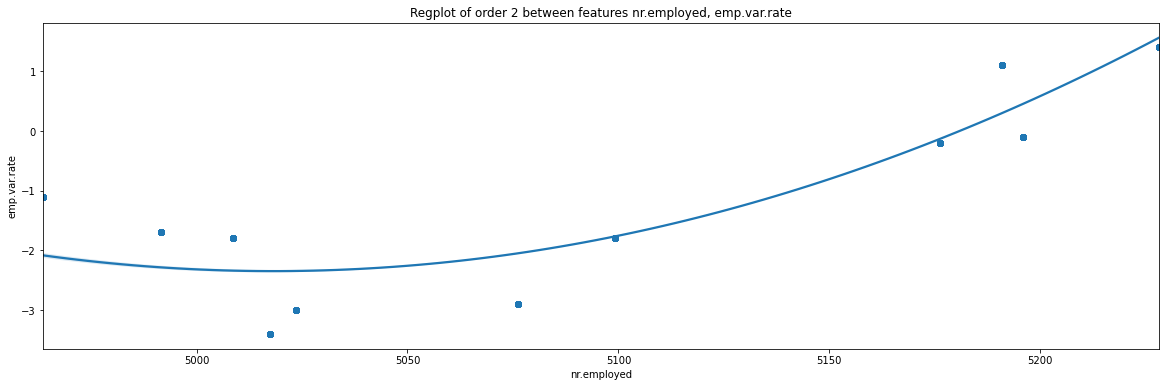

In [21]:
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams.update({'font.size': 10})
sns.regplot(x = 'nr.employed', y = 'emp.var.rate', data = num_data, order =2)
plt.title("Regplot of order 2 between features nr.employed, emp.var.rate")
plt.show()

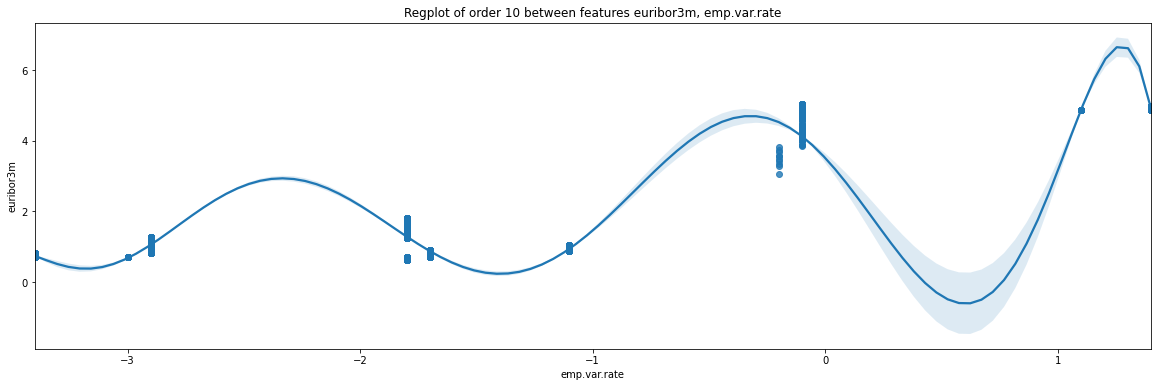

In [22]:
sns.regplot(x = 'emp.var.rate', y = 'euribor3m', data = num_data, order = 8)
plt.title("Regplot of order 10 between features euribor3m, emp.var.rate")
plt.show()

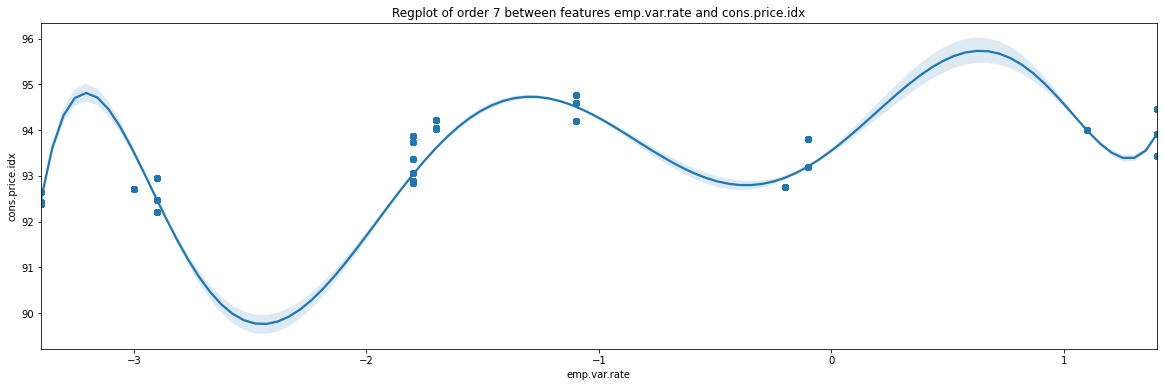

In [23]:
sns.regplot(x = 'emp.var.rate', y = 'cons.price.idx', data = num_data, order = 7)
plt.title("Regplot of order 7 between features emp.var.rate and cons.price.idx")
plt.show()

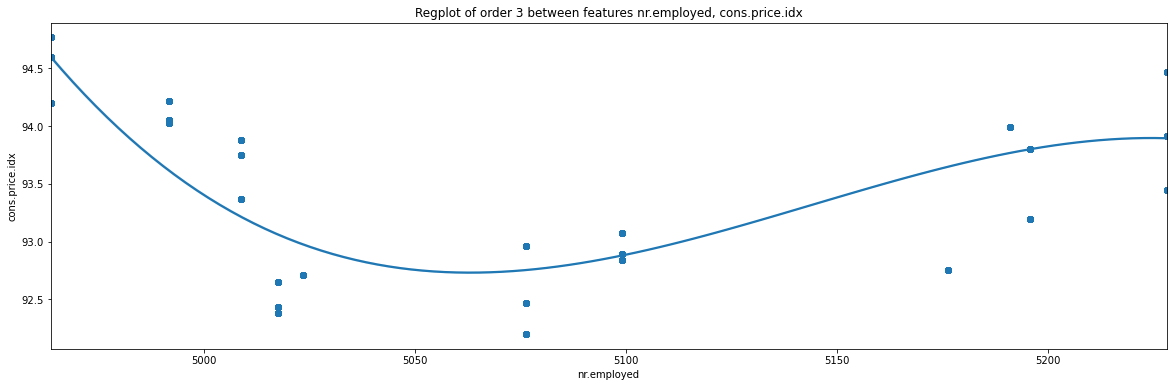

In [24]:
sns.regplot(x = 'nr.employed', y = 'cons.price.idx', data = num_data, order =3)
plt.title("Regplot of order 3 between features nr.employed, cons.price.idx")
plt.show()

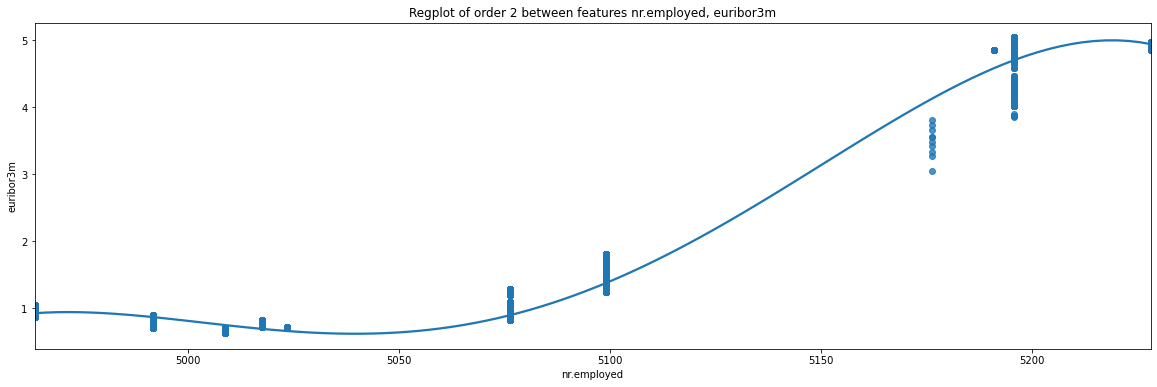

In [25]:
sns.regplot(x = 'nr.employed', y = 'euribor3m', data = num_data, order =4)
plt.title("Regplot of order 2 between features nr.employed, euribor3m")
plt.show()

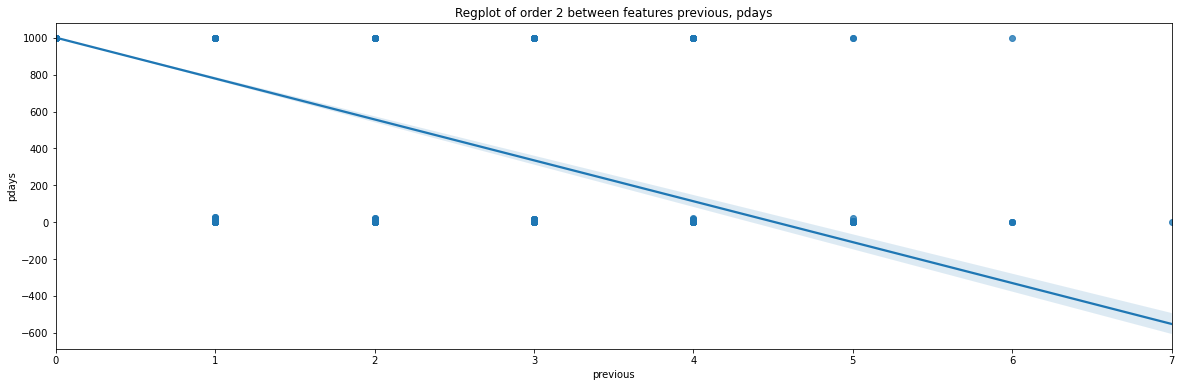

In [26]:
sns.regplot(x = 'previous', y = 'pdays', data = num_data)
plt.title("Regplot of order 2 between features previous, pdays")
plt.show()

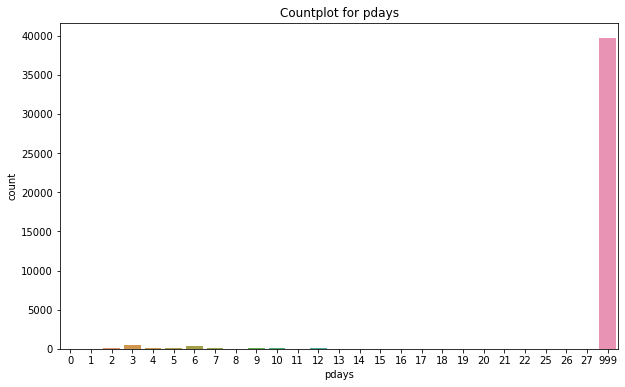

In [27]:
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams.update({'font.size': 10})
sns.countplot(num_data.loc[:, 'pdays'])
plt.title("Countplot for pdays")
plt.show()

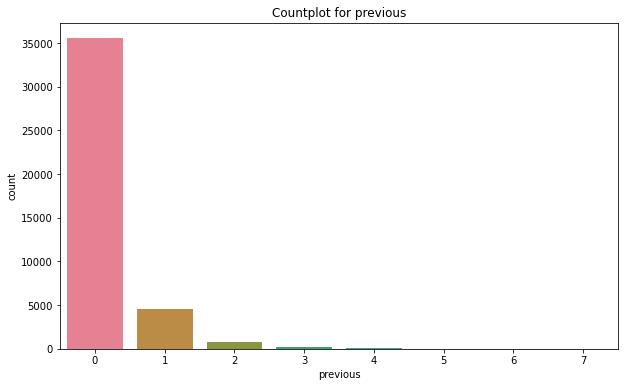

In [28]:
sns.countplot(num_data.loc[:,'previous'], palette='husl')
plt.title('Countplot for {}'.format('previous'))
plt.show()

In [29]:
cat_data.insert(0, 'previous',num_data.loc[:, 'previous'])
cat_data.insert(1, 'pdays', num_data.loc[:, 'pdays'])

num_data.drop(columns = ['previous', 'pdays'], inplace = True)

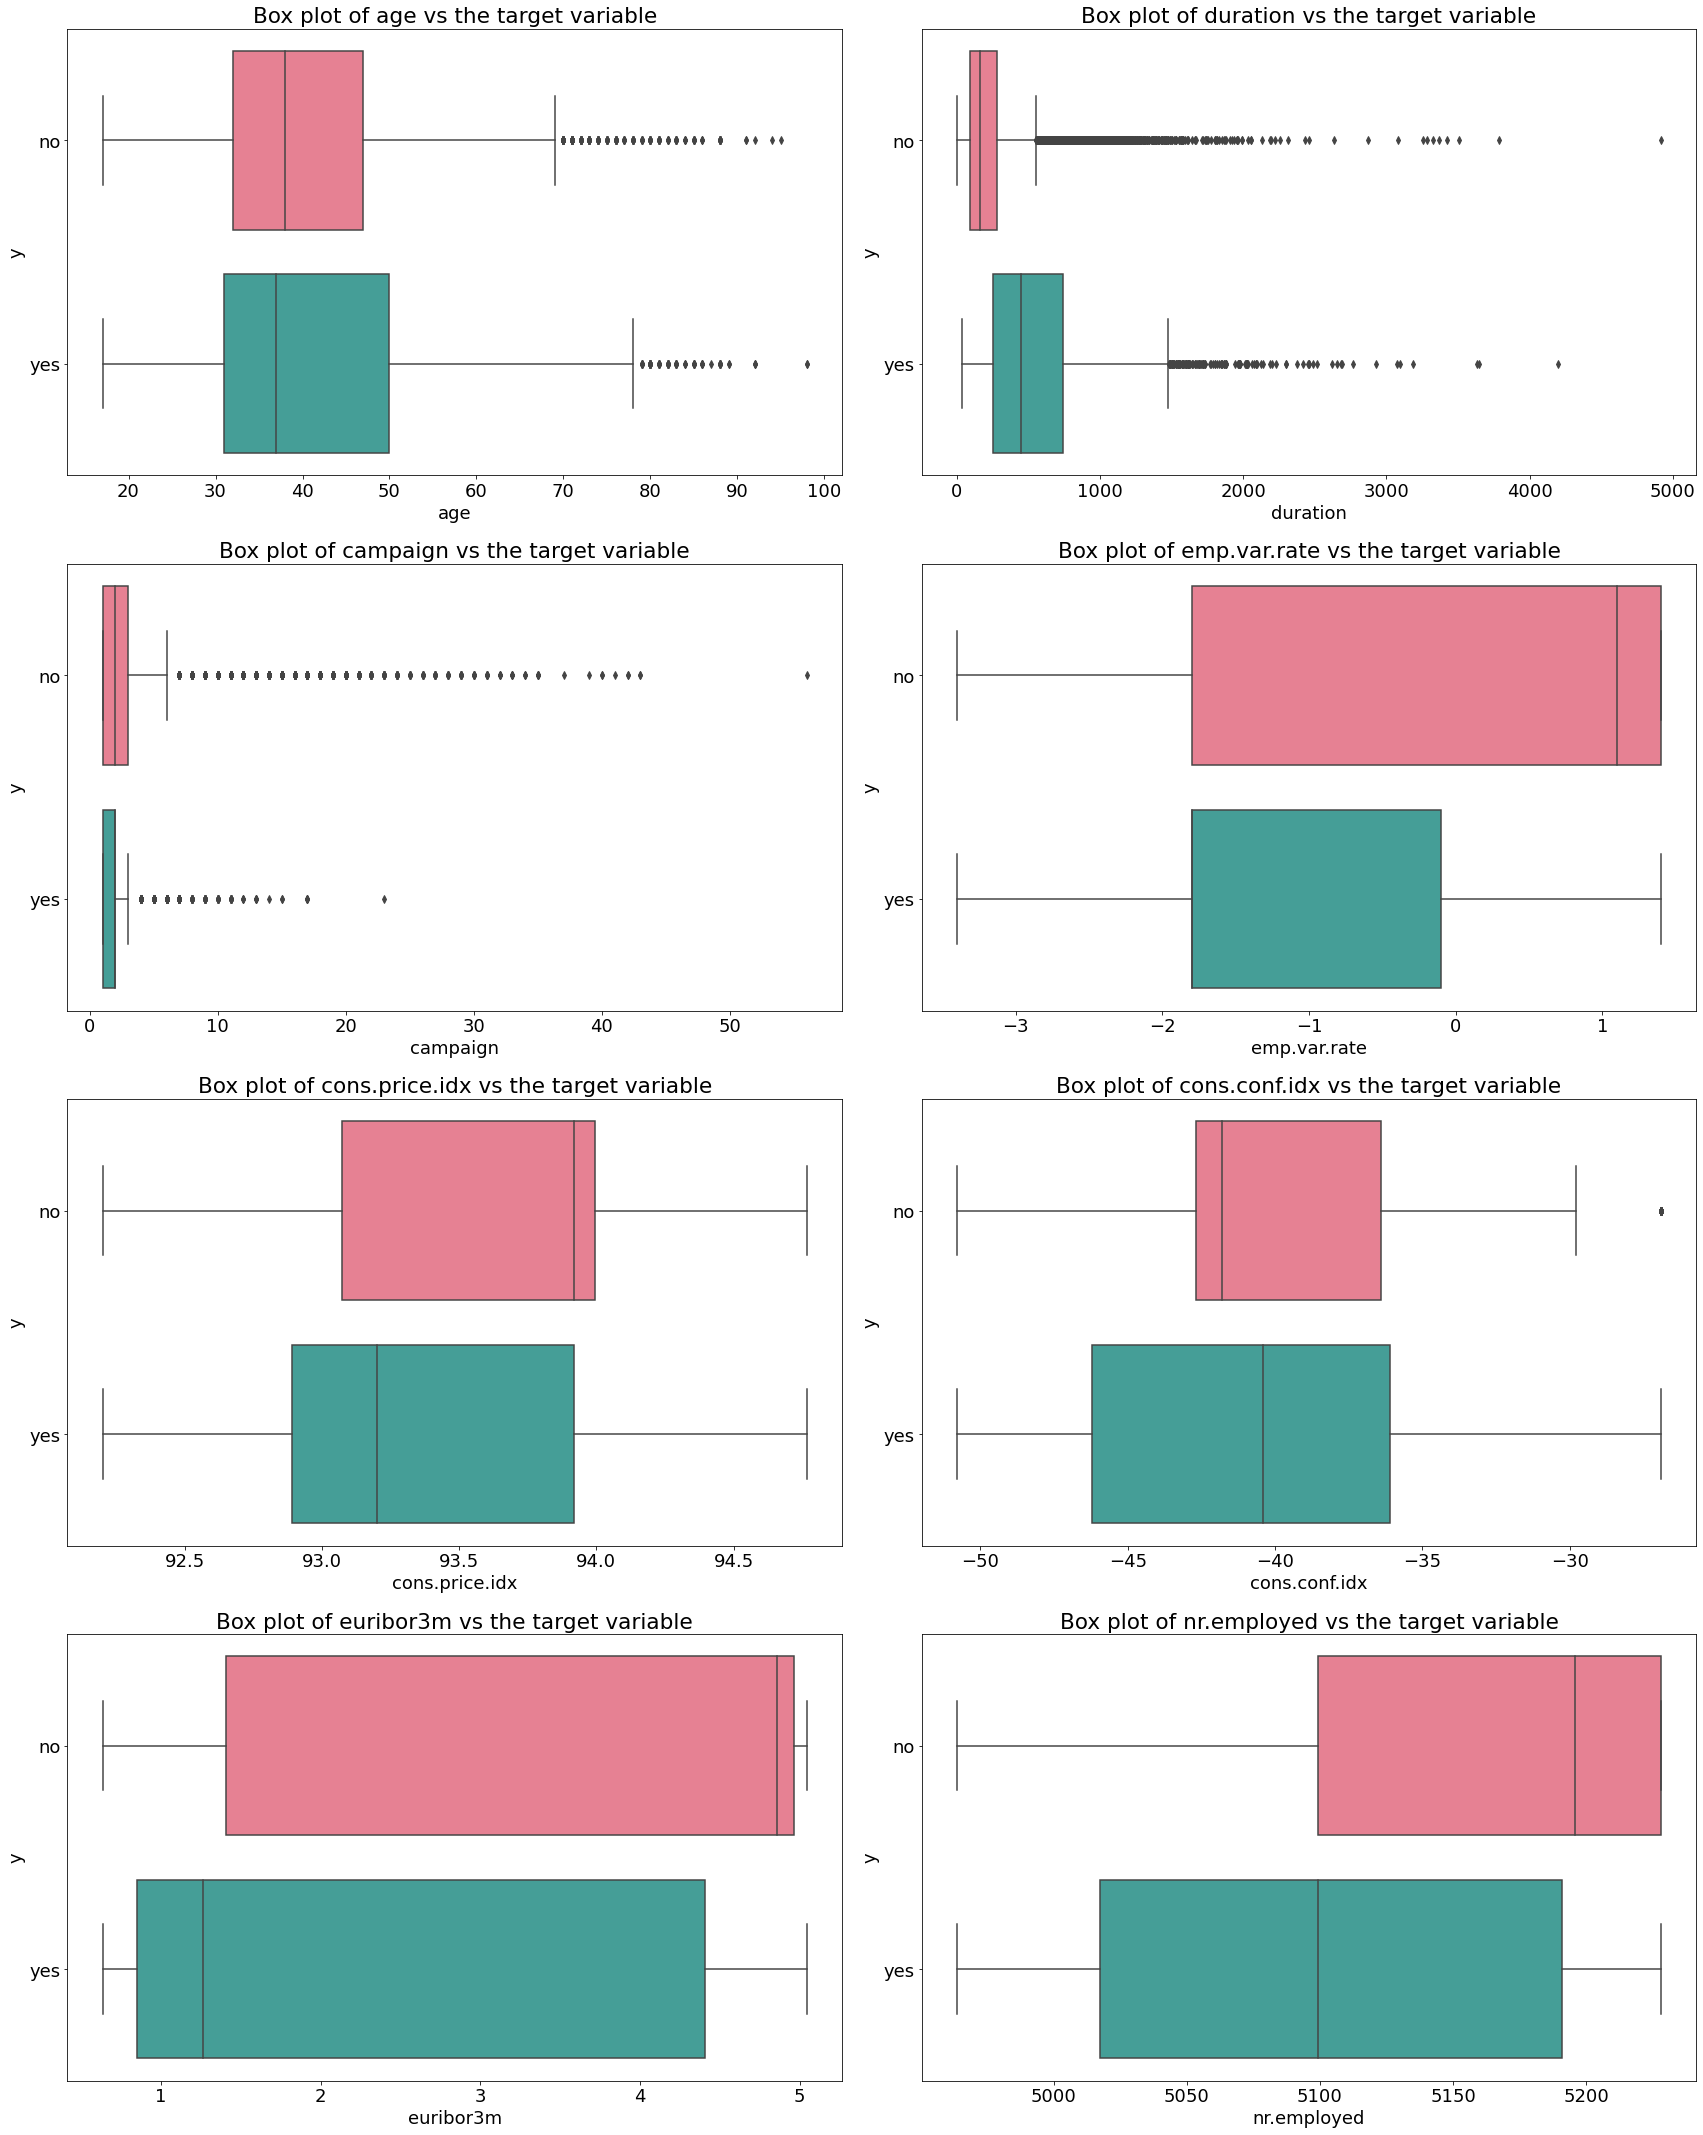

In [30]:
plt.rcParams['figure.figsize']=(24,30)
plt.rcParams.update({'font.size': 18})
figure, axes = plt.subplots(4, 2)
for col, axis in zip(num_data.columns, axes.flatten()):
    sns.boxplot(x = num_data.loc[:, col], y = cat_data.loc[:, 'y'], ax = axis, palette='husl')
    axis.set_title("Box plot of {} vs the target variable".format(col))
    plt.tight_layout()
plt.show()

## Multivariate analysis of numerical data
**Pairplot to analyse pairwise relationship between all the numerical variables and the target variable**

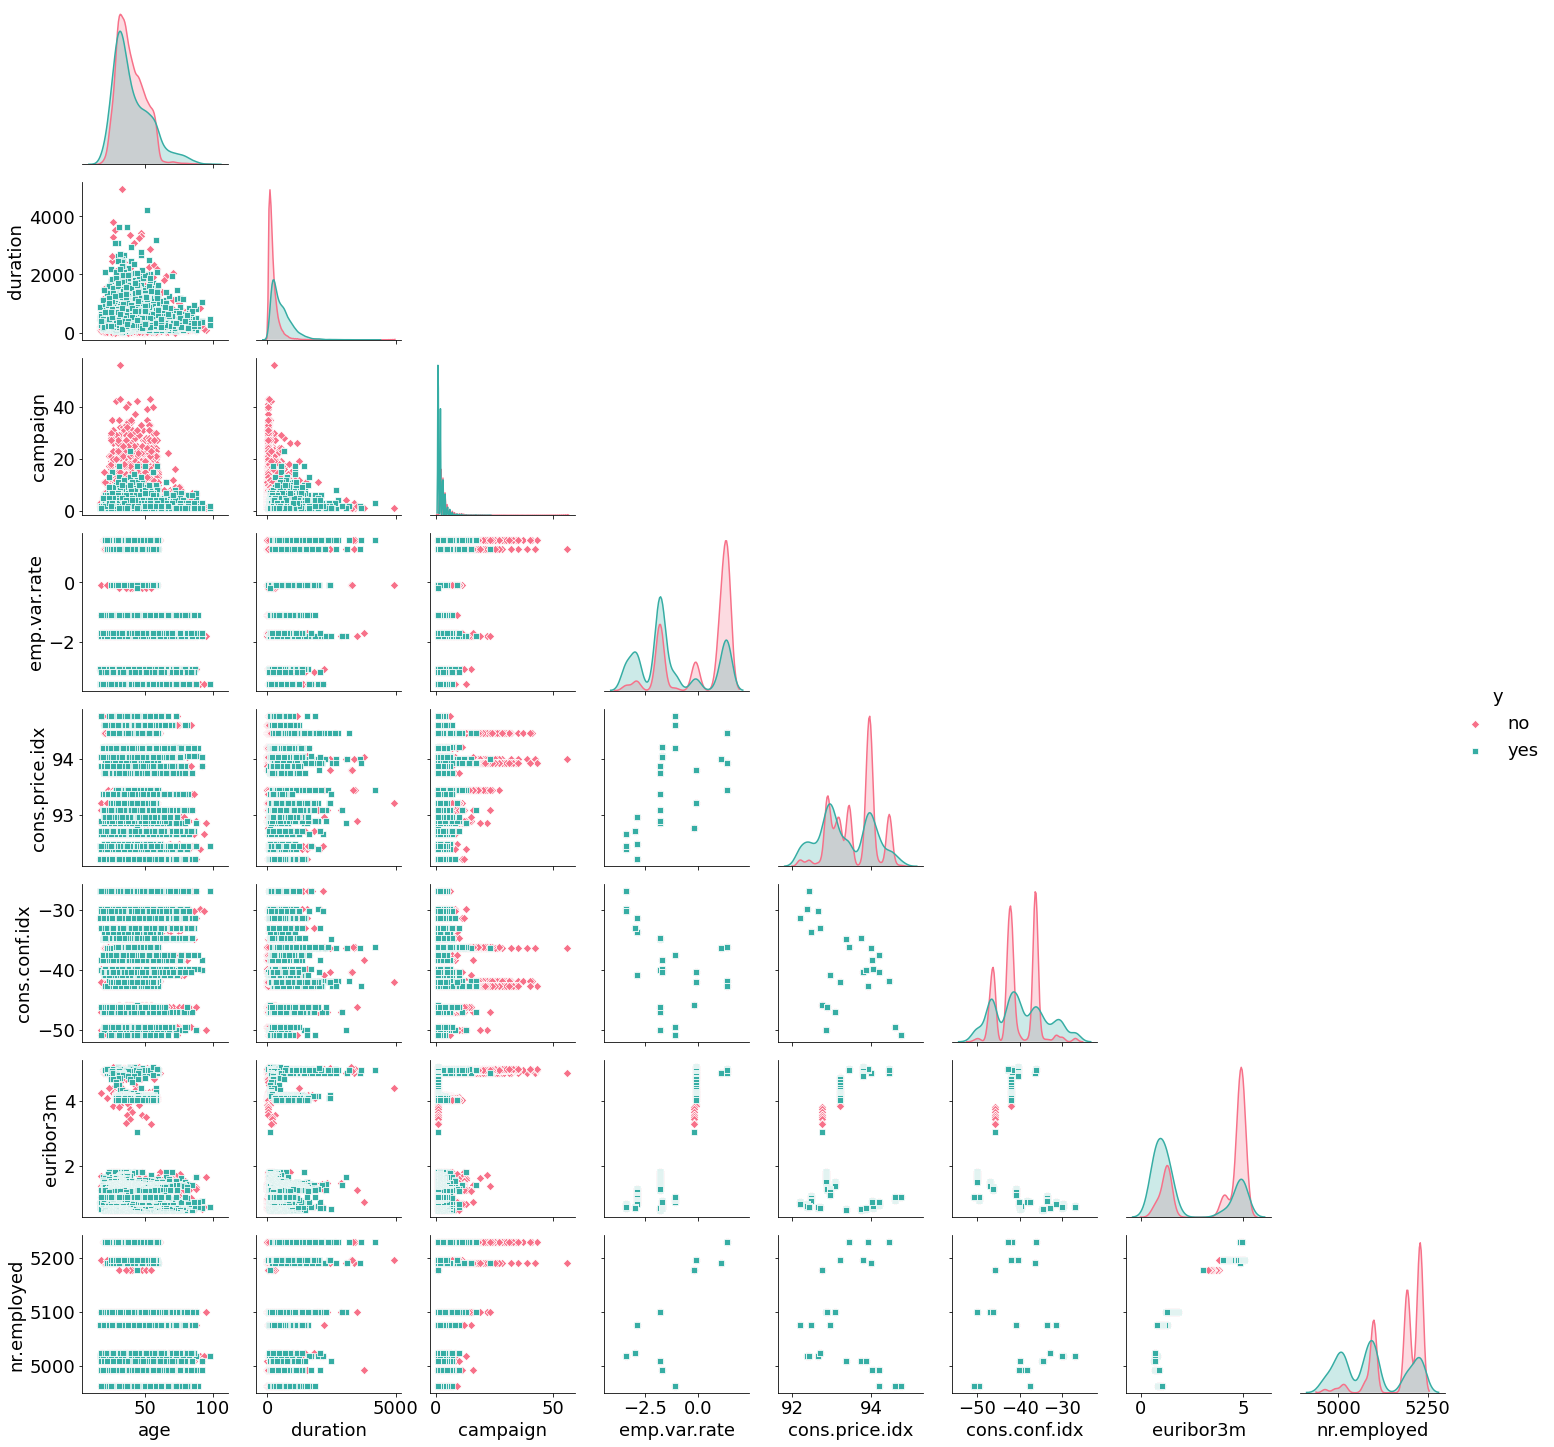

In [31]:
# to make the pairplot for all numerical features using the the target variable as hue, 
# creating a new dataframe that contains these features and the target variable.
num_target = pd.concat([num_data, data.loc[:,'y']], axis = 1)

sns.pairplot(data = num_target, 
             hue = 'y', 
             corner = True, 
             markers = ['D', 's'], 
             palette = "husl", 
             kind = 'scatter',
             diag_kind='kde',
#              plot_kws = {'alpha': 0.6, 's': 80},
             hue_order = ['no', 'yes'])
plt.show()

## Starting EDA for the categorical features

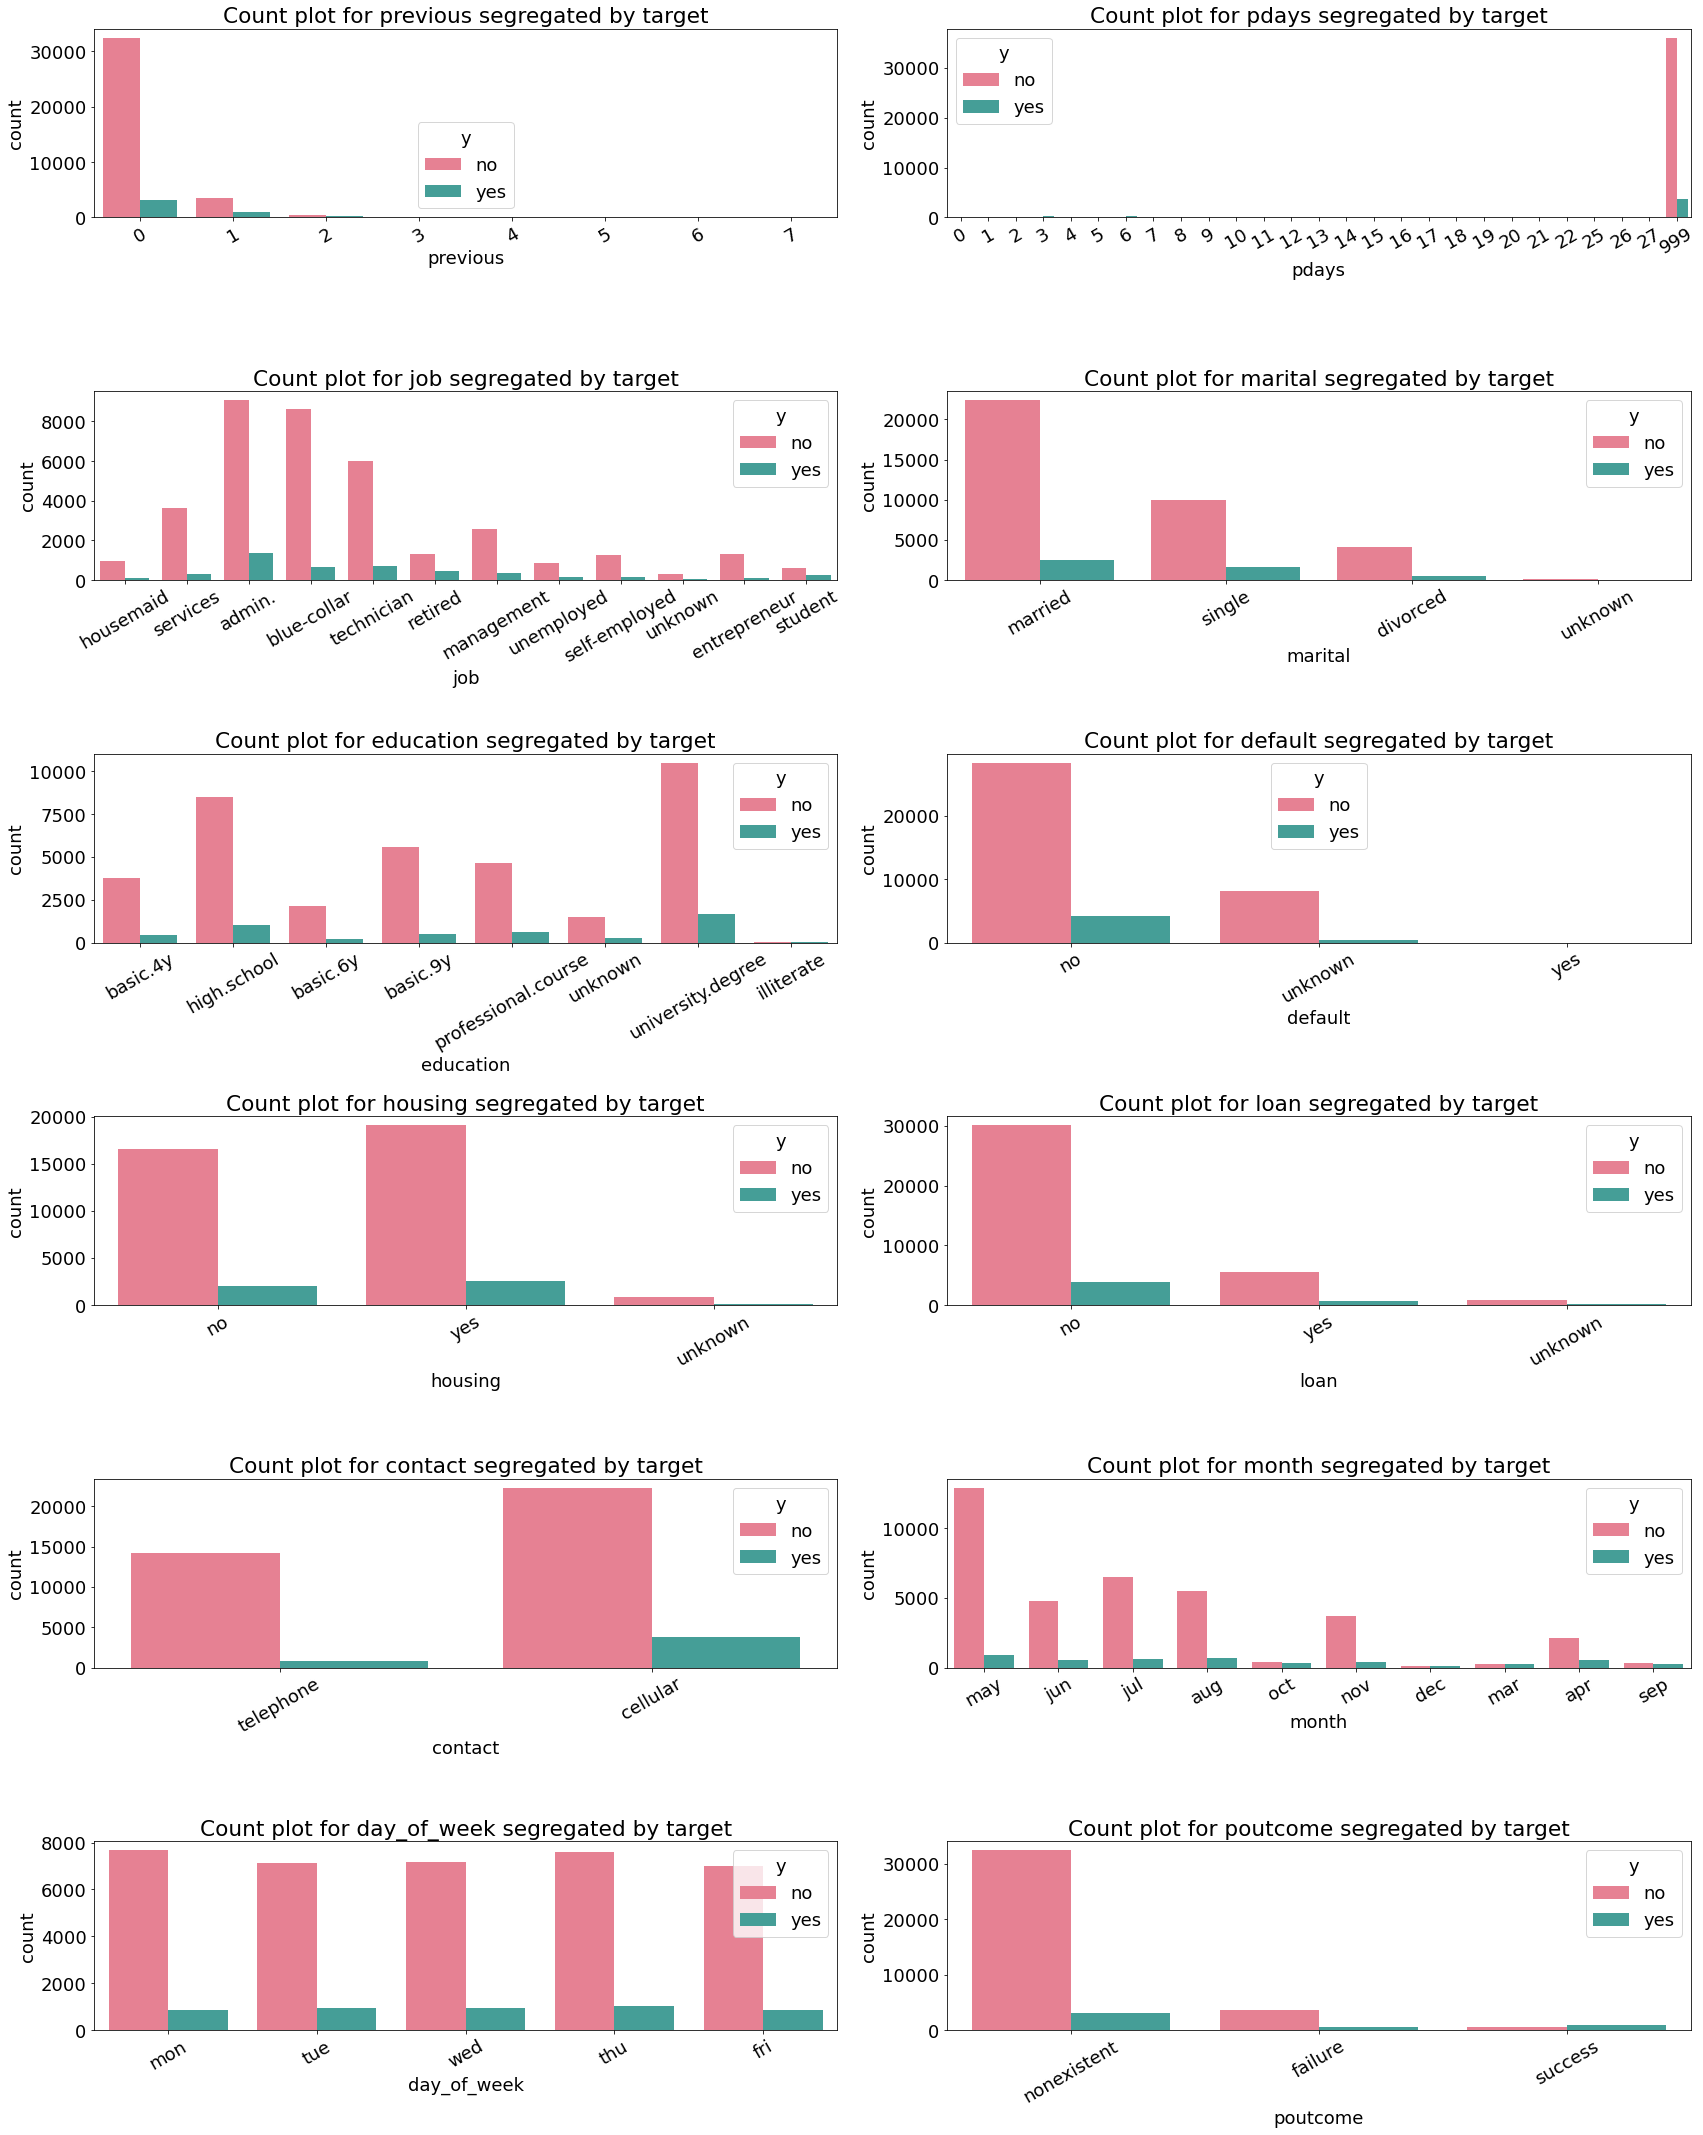

In [32]:
plt.rcParams['figure.figsize']=(24,30)
plt.rcParams.update({'font.size': 18})
figure, axes = plt.subplots(6, 2)

for col, axis in zip(cat_data.columns, axes.flatten()):
    sns.countplot(cat_data.loc[:, col], hue = cat_data.loc[:, 'y'], ax = axis, palette='husl')
    axis.set_title("Count plot for {} segregated by target".format(col))
    for tick in axis.get_xticklabels(): 
        tick.set_rotation(30) 
    plt.tight_layout()
    
plt.show()    

## Multivariate analysis for categorical data


Heatmap for Cramer's V correlation between categorical data


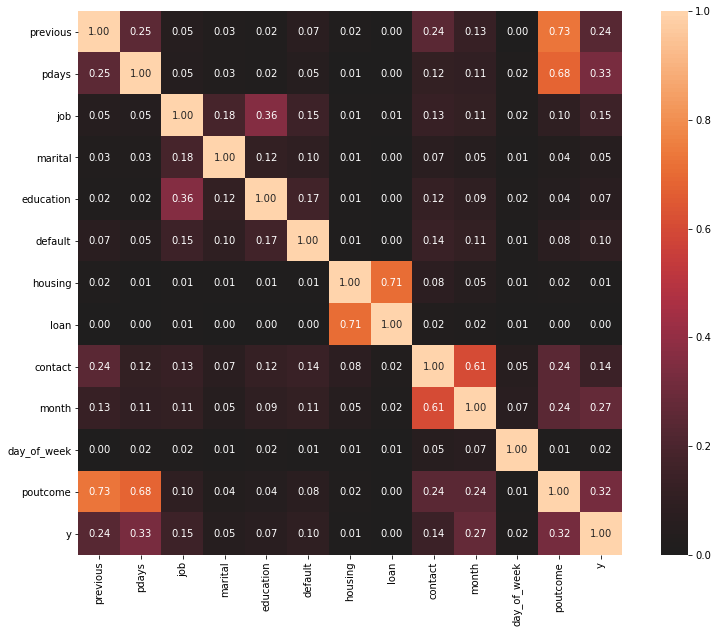

In [33]:
from dython import nominal
plt.rcParams['figure.figsize']=(14,10)
plt.rcParams.update({'font.size': 10})
print("\nHeatmap for Cramer's V correlation between categorical data")

nominal.associations(cat_data, nominal_columns='all', annot = True)
plt.show()

## Multivariate analysis of the entire dataset

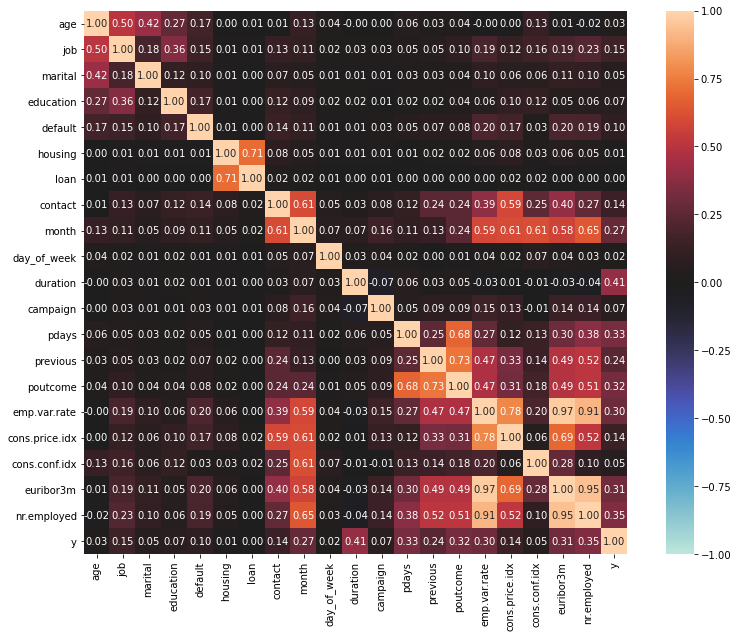

In [40]:
from dython import nominal
plt.rcParams['figure.figsize']=(14,10)
plt.rcParams.update({'font.size': 10})
print("\nHeatmap for correlation between all the features in the data")

nominal.associations(data, nominal_columns=list(cat_data.columns), annot = True)
plt.show()

In [ ]:
cat_data.columns